In [112]:
import numpy as np
import math
import time
import pandas as pd
from tqdm import tqdm
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

import data
import features

In [110]:
temp, dico = data.load_input_data('data/train_input.csv')
output = data.load_output_data('data/challenge_output.csv', temp, dico)

** Variables:**
* **dico**: dictionnaire avec pour chaque nom de batiment les paramètres de réglages ayant subi un premier traitement. dico['buildings] = liste de tous les noms de building
* **temp**: outside temperature
* **output**: dictionnaire avec pour chaque nom de batiment les données à prédire. Le champs 'fields' contient les noms des 5 outputs:
* **all_features**: dictionnaire des features pour chaque réglage de building

**Outputs**:
* **0**: office_temperature_degreC
* **1**: Q_total_heating_kW
* **2**: Q_total_AC_kW
* **3**: Q_total_gains_kW
* **4**: Q_total_kW

In [113]:
all_features = features.load_all_features(dico, temp, remove_useless=True)
all_features['building_10_0'].head()

100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [00:10<00:00, 22.92it/s]


All the features have been loaded in 10.48 sec
16 useless features have been removed. There are now 17 features for each setting.


,AC_on,AC_value,heating_on,heating_value,hour,nb_occupants,orientation,outside_temp,surface_1_m2_OUTW,surface_2_m2_OUTW,surface_3_m2_OUTW,surface_4_m2_OUTW,useful_surface_m2,window_percent_1_outwall,window_percent_2_outwall,window_percent_3_outwall,window_percent_4_outwall
0,0,32.0,0,17.0,0,467.0,35.0,1.2,844.2,652.67,1266.3,1109.55,6073.55,70.0,70.0,70.0,70.0
1,0,32.0,0,17.0,1,467.0,35.0,5.6,844.2,652.67,1266.3,1109.55,6073.55,70.0,70.0,70.0,70.0
2,0,32.0,0,17.0,2,467.0,35.0,9.9,844.2,652.67,1266.3,1109.55,6073.55,70.0,70.0,70.0,70.0
3,0,32.0,0,17.0,3,467.0,35.0,9.7,844.2,652.67,1266.3,1109.55,6073.55,70.0,70.0,70.0,70.0
4,0,32.0,0,17.0,4,467.0,35.0,9.5,844.2,652.67,1266.3,1109.55,6073.55,70.0,70.0,70.0,70.0


In [4]:
all_features['building_10_0'].describe()

,AC_on,AC_value,heating_on,heating_value,hour,nb_occupants,orientation,outside_temp,surface_1_m2_OUTW,surface_2_m2_OUTW,surface_3_m2_OUTW,surface_4_m2_OUTW,useful_surface_m2,window_percent_1_outwall,window_percent_2_outwall,window_percent_3_outwall,window_percent_4_outwall
count,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.0,8736.0,8736.000000,8.736000e+03,8.736000e+03,8.736000e+03,8.736000e+03,8.736000e+03,8736.0,8736.0,8736.0,8736.0
mean,0.380952,28.657381,0.369048,18.887560,11.500000,467.0,35.0,11.220559,8.442000e+02,6.526700e+02,1.266300e+03,1.109550e+03,6.073550e+03,70.0,70.0,70.0,70.0
std,0.485649,3.392067,0.482574,2.550248,6.922583,0.0,0.0,7.060464,1.238121e-10,5.741514e-11,8.049489e-11,1.341581e-11,7.631097e-10,0.0,0.0,0.0,0.0
min,0.000000,24.550000,0.000000,16.190000,0.000000,467.0,35.0,-6.650000,8.442000e+02,6.526700e+02,1.266300e+03,1.109550e+03,6.073550e+03,70.0,70.0,70.0,70.0
25%,0.000000,24.600000,0.000000,17.000000,5.750000,467.0,35.0,5.900000,8.442000e+02,6.526700e+02,1.266300e+03,1.109550e+03,6.073550e+03,70.0,70.0,70.0,70.0
50%,0.000000,28.820000,0.000000,17.100000,11.500000,467.0,35.0,10.700000,8.442000e+02,6.526700e+02,1.266300e+03,1.109550e+03,6.073550e+03,70.0,70.0,70.0,70.0
75%,1.000000,32.000000,1.000000,22.620000,17.250000,467.0,35.0,16.300000,8.442000e+02,6.526700e+02,1.266300e+03,1.109550e+03,6.073550e+03,70.0,70.0,70.0,70.0
max,1.000000,32.000000,1.000000,22.620000,23.000000,467.0,35.0,31.800000,8.442000e+02,6.526700e+02,1.266300e+03,1.109550e+03,6.073550e+03,70.0,70.0,70.0,70.0


In [6]:
all_features['building_10_0'].columns

Index(['AC_on', 'AC_value', 'heating_on', 'heating_value', 'hour',
       'nb_occupants', 'orientation', 'outside_temp', 'surface_1_m2_OUTW',
       'surface_2_m2_OUTW', 'surface_3_m2_OUTW', 'surface_4_m2_OUTW',
       'useful_surface_m2', 'window_percent_1_outwall',
       'window_percent_2_outwall', 'window_percent_3_outwall',
       'window_percent_4_outwall'],
      dtype='object')

** Plot some features **

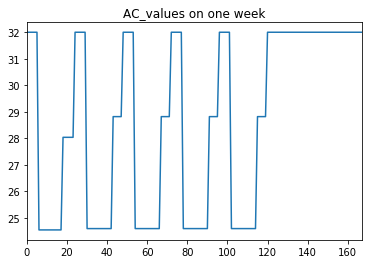

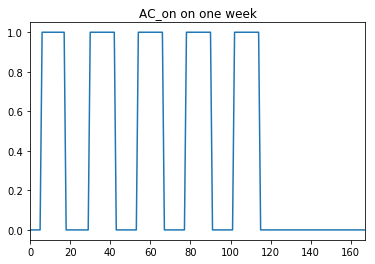

In [7]:
all_features['building_10_0']['AC_value'][:7*24].plot()
plt.title('AC_values on one week')
plt.show()
all_features['building_10_0']['AC_on'][:7*24].plot()
plt.title('AC_on on one week')
plt.show()

### Train / test data on ONE building

Séparer aléatoirement des ensembles de train et de test sur un même building

In [5]:
def load_data_train_test_one_building(features_names, features_df, output, name_building='building_10_0',
                         pct_train=0.8, output_var='Q_total_AC_kW'):
    """ Random train / test on the same building"""
    
    n = len(features_df)
    n_train = int(pct_train * n)
    
    indices = np.random.permutation(range(n))
    
    X_train = np.zeros((n_train, len(features_names))) 
    X_test = np.zeros((n - n_train, len(features_names))) 

    for i in range(len(features_names)):
        X_train[:, i] = features_df[features_names[i]][indices[:n_train]]
        X_test[:, i] = features_df[features_names[i]][indices[n_train:]]

    Y_train = output[name_building][indices[:n_train], output['fields'][output_var]]
    Y_test = output[name_building][indices[n_train:], output['fields'][output_var]]

    return X_train, Y_train, X_test, Y_test

### Train / test data on ALL buildings

Séparer aléatoirement les réglages des immeubles pour mettre 20% des building dans les données de test et le reste dans le train

In [14]:
def load_data_train_test(features_names, all_features, output,        
                         pct_train=0.8, output_var='Q_total_AC_kW', print_test=False):
    """ Random train / test on all buildings"""
    
    name_buildings = list(all_features.keys())
    nb_buildings = len(name_buildings)
    nb_buildings_train = int(pct_train * nb_buildings)  # nb of buildings in train set
    
    indices = np.random.permutation(range(nb_buildings))
    
    X_train = all_features[name_buildings[indices[0]]][features_names]
    Y_train = output[name_buildings[indices[0]]][:, output['fields'][output_var]]
    X_test = all_features[name_buildings[indices[-1]]][features_names]
    Y_test = output[name_buildings[indices[-1]]][:, output['fields'][output_var]]
    test_building = []
    
    # Train sets
    for i in indices[1:nb_buildings_train]:
        building = name_buildings[i]
        X_train = np.concatenate((X_train, all_features[building][features_names]), axis=0)
        Y_train = np.concatenate((Y_train, output[building][:, output['fields'][output_var]]), axis=0)

    # Test sets
    for i in indices[nb_buildings_train:-1]:
        building = name_buildings[i]
        test_building.append(building)
        X_test = np.concatenate((X_test, all_features[building][features_names]), axis=0)
        Y_test = np.concatenate((Y_test, output[building][:, output['fields'][output_var]]), axis=0)
        
    if print_test:
        print(test_building)

    return X_train, Y_train, X_test, Y_test

In [114]:
list(all_features.keys())

['building_10_0',
 'building_10_1',
 'building_10_10',
 'building_10_11',
 'building_10_12',
 'building_10_13',
 'building_10_14',
 'building_10_15',
 'building_10_16',
 'building_10_17',
 'building_10_18',
 'building_10_19',
 'building_10_2',
 'building_10_3',
 'building_10_4',
 'building_10_5',
 'building_10_6',
 'building_10_7',
 'building_10_8',
 'building_10_9',
 'building_11_0',
 'building_11_1',
 'building_11_10',
 'building_11_11',
 'building_11_12',
 'building_11_13',
 'building_11_14',
 'building_11_15',
 'building_11_16',
 'building_11_17',
 'building_11_18',
 'building_11_19',
 'building_11_2',
 'building_11_3',
 'building_11_4',
 'building_11_5',
 'building_11_6',
 'building_11_7',
 'building_11_8',
 'building_11_9',
 'building_12_0',
 'building_12_1',
 'building_12_10',
 'building_12_11',
 'building_12_12',
 'building_12_13',
 'building_12_14',
 'building_12_15',
 'building_12_16',
 'building_12_17',
 'building_12_18',
 'building_12_19',
 'building_12_2',
 'building_12_3'

In [127]:
bs = list(all_features.keys())
b = bs [135]
print(b)

building_4_5


In [128]:
import re
numbers = [int(x[1:]) for x in  re.findall("_[0-9]*", b)]
numbers[0], numbers[1]

(4, 5)

In [55]:
X_val = features.load_data_features('./data/test_input.csv')

100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [00:02<00:00, 15.82it/s]


All the features have been loaded in 2.29 sec
16 useless features have been removed. There are now 17 features for each setting.


## Decision Tree Regression

In [12]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [10]:
def test_model(model, test_train_func, features_names, features_df, output, output_var='Q_total_AC_kW', N=5):
    """ To train several models with different train/test set and get the average score """
    score_train = []
    score_test = []
    
    for _ in tqdm(range(N)):
        X_train, Y_train, X_test, Y_test =  test_train_func(features_names, features_df, output, output_var=output_var)
    
        model.fit(X_train , Y_train)
        score_train.append(model.score(X_train, Y_train))
        score_test.append(model.score(X_test, Y_test))
        
    return np.mean(score_train), np.mean(score_test)

In [16]:

features_names = all_features[list(all_features.keys())[0]].columns
X_train, Y_train, X_test, Y_test = load_data_train_test(features_names, all_features, output,
                                                        pct_train=0.8, output_var='Q_total_AC_kW', print_test=False)

In [19]:
model = DecisionTreeRegressor()
model.fit(X_train , Y_train)

print("Score train R^2:", model.score(X_train, Y_train))
print("Score test R^2:", model.score(X_test, Y_test))

Score train R^2: 0.963739313746
Score test R^2: 0.939413281969


In [24]:
Y_pred = model.predict(X_test)
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
np.sqrt(mse)

12.558682419429203

In [39]:
Y_val = model.predict(X_val)

In [52]:
Y_val.shape, len(buildings_eval)*364*24

((314496,), 314496)

In [62]:
output['fields'].keys()

dict_keys(['office_temperature_degreC', 'Q_total_heating_kW', 'Q_total_AC_kW', 'Q_total_gains_kW', 'Q_total_kW'])

In [73]:
model_dico = {}
pred = {}

for o in output['fields']:
    print("Model for the output {}...".format(o))
    model_dico[o] = DecisionTreeRegressor()
    X_train, Y_train, _, _ = load_data_train_test(features_names, all_features, output,        
                                                  pct_train=1, output_var=o)
    model_dico[o].fit(X_train , Y_train)
    
    # Train scores
    print("Score R^2 train:", model_dico[o].score(X_train, Y_train))
    y_pred = model_dico[o].predict(X_train)
    print("sqrt(mse):", np.sqrt(sklearn.metrics.mean_squared_error(Y_train, y_pred)))
    
    # Prediction on eval data
    pred[o] = model_dico[o].predict(X_val)


Model for the output office_temperature_degreC...
Score R^2 train: 0.961132860703
sqrt(mse): 0.568461187184
Model for the output Q_total_heating_kW...
Score R^2 train: 0.943280311639
sqrt(mse): 12.3215638763
Model for the output Q_total_AC_kW...
Score R^2 train: 0.960365665896
sqrt(mse): 10.2475017169
Model for the output Q_total_gains_kW...
Score R^2 train: 1.0
sqrt(mse): 6.33692727274e-11
Model for the output Q_total_kW...
Score R^2 train: 0.982431127335
sqrt(mse): 16.0158401397


In [63]:
output_names = list(output['fields'].keys())
':'.join(output_names)

'office_temperature_degreC:Q_total_heating_kW:Q_total_AC_kW:Q_total_gains_kW:Q_total_kW'

In [88]:
def save_output(pred, output_names, file):
    
    output_text = ':'.join(output_names)
    
    for i in tqdm(range(len(pred[output_names[0]]))):
        output_text += '\n'
        output_text += ':'.join([str(pred[o][i]) for o in output_names])
        
    with open(file, 'w') as file:
        file.write(output_text)

In [89]:
save_output(pred, list(output['fields'].keys()), './data/pred_tree.csv')

100%|███████████████████████████████████████████████████████████████████████| 314496/314496 [00:13<00:00, 23220.12it/s]


** Resultats:**
* Tree, un building, ['outside_temp', 'AC_in', 'AC_value'] : train = 88%, **test = 61%**
* Tree, un building, ['outside_temp', 'AC_in', 'AC_value', 'heating_in'] : train = 91%, **test = 66%**
* Tree, un building, all features : train = 99%, **test = 76%**
* Tree, all buildings, ['AC_in', 'AC_value', 'heating_in', 'heating_value', 'hour', 'light_percent_on_night_WE', 'outside_temp'] : train = 84%, **test = 84**
* Tree, all buildings, all features not useless : train = 96%, **test = 96%**

# Plot results

In [214]:
start_time = time.time()
X_train, Y_train, X_test, Y_test = load_data_train_test(features_names, all_features, output, print_test=True)
print("Data loaded in {} sec".format(round(time.time() - start_time, 2)))

X_train.shape, X_test.shape

['building_1_15', 'building_4_7', 'building_6_2', 'building_11_1', 'building_1_12', 'building_4_19', 'building_8_19', 'building_8_14', 'building_4_6', 'building_6_11', 'building_4_1', 'building_9_7', 'building_6_1', 'building_6_16', 'building_5_2', 'building_9_9', 'building_9_6', 'building_4_0', 'building_5_18', 'building_1_19', 'building_5_13', 'building_9_13', 'building_12_9', 'building_9_17', 'building_1_4', 'building_8_16', 'building_8_18', 'building_3_1', 'building_1_18', 'building_6_7', 'building_10_18', 'building_12_5', 'building_6_10', 'building_5_14', 'building_7_5', 'building_10_16', 'building_9_18', 'building_2_19', 'building_1_14', 'building_12_2', 'building_7_7', 'building_3_2', 'building_8_11', 'building_2_13', 'building_6_5', 'building_3_11', 'building_5_1']
Data loaded in 15.15 sec


((1677312, 17), (419328, 17))

In [215]:
Y_test.shape, y_pred.shape

((419328,), (419328,))

In [229]:
model = DecisionTreeRegressor()

model.fit(X_train , Y_train)

print("R^2, train, test:", model.score(X_train, Y_train), model.score(X_test, Y_test))

y_pred = model.predict(X_test)
mse = sklearn.metrics.mean_squared_error(Y_test, y_pred)
print("Test MSE:", mse)
print("sqrt(MSE):", np.sqrt(mse))
np.mean(Y_test[Y_test > 0]), np.mean(y_pred)

R^2, train, test: 0.962042408236 0.949618392544
Test MSE: 130.019575902
sqrt(MSE): 11.4026126787


(143.09285742400576, 15.063079632624129)

635.164114479


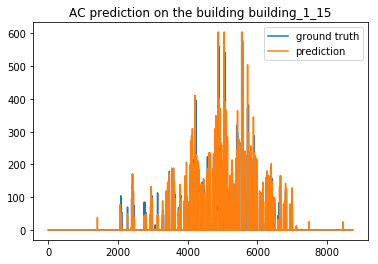

In [230]:
building = 'building_1_15'

X = all_features[building][features_names]
Y = output[building][:, output['fields']['Q_total_AC_kW']]
                     
y_pred = model.predict(X) 

mse = sklearn.metrics.mean_squared_error(Y, y_pred)
print(mse)

plt.plot(Y, label='ground truth')
plt.plot(y_pred, label='prediction')
plt.legend()
plt.title('AC prediction on the building {}'.format(building))
plt.show()

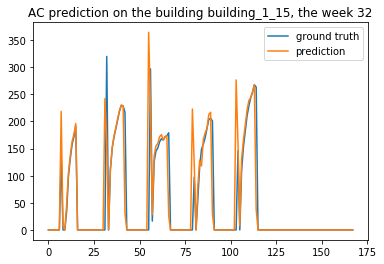

In [231]:
num_sem = 32

plt.plot(Y[num_sem*7*24:(num_sem+1)*7*24], label='ground truth')
plt.plot(y_pred[num_sem*7*24:(num_sem+1)*7*24], label='prediction')
plt.legend()
plt.title('AC prediction on the building {}, the week {}'.format(building, num_sem))
plt.show()

# Test on other outputs

In [235]:
features_names = [x for x in all_features['building_10_0'].columns if x not in useless_features]
print(features_names)

['AC_in', 'AC_value', 'heating_in', 'heating_value', 'hour', 'nb_occupants', 'orientation', 'outside_temp', 'surface_1_m2_OUTW', 'surface_2_m2_OUTW', 'surface_3_m2_OUTW', 'surface_4_m2_OUTW', 'useful_surface_m2', 'window_percent_1_outwall', 'window_percent_2_outwall', 'window_percent_3_outwall', 'window_percent_4_outwall']


In [236]:
model = DecisionTreeRegressor()

train_score, test_score = test_model(model, load_data_train_test, features_names,
                                     all_features, output, output_var='Q_total_heating_kW', N=1)
print("Train score: {}%, test score: {}%".format(round(train_score*100, 2), (round(test_score*100, 2))))

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:20<00:00, 20.18s/it]


Train score: 94.31%, test score: 94.3%


157.17706096


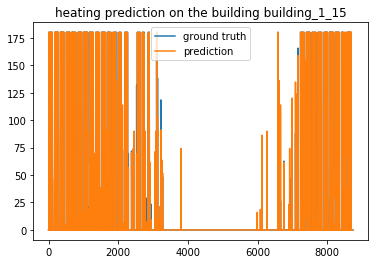

In [237]:
building = 'building_1_15'

X = all_features[building][features_names]
Y = output[building][:, output['fields']['Q_total_heating_kW']]
                     
y_pred = model.predict(X) 

mse = sklearn.metrics.mean_squared_error(Y, y_pred)
print(mse)

plt.plot(Y, label='ground truth')
plt.plot(y_pred, label='prediction')
plt.legend()
plt.title('heating prediction on the building {}'.format(building))
plt.show()

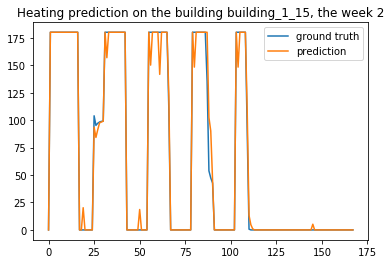

In [241]:
num_sem = 2

plt.plot(Y[num_sem*7*24:(num_sem+1)*7*24], label='ground truth')
plt.plot(y_pred[num_sem*7*24:(num_sem+1)*7*24], label='prediction')
plt.legend()
plt.title('Heating prediction on the building {}, the week {}'.format(building, num_sem))
plt.show()